https://engcourses-uofa.ca/books/introduction-to-solid-mechanics/energy/single-degree-of-freedom/#dynamic-equilibrium-of-a-mass-spring-system-5

9.1.2

In [2]:
from sympy import dsolve,Eq,trigsimp
import sympy as sp
m,g,k,t = sp.symbols("m g k t")
x = sp.Function("x")
dx = x(t).diff(t)
ddx = x(t).diff(t,2)
x1 = x(t).subs(t,0)
dx1 = dx.subs(t,0)
s = trigsimp(dsolve(m*g-k*x(t)-m*ddx,x(t),ics ={x1:0,dx1:0}))
display(s)
display(s.rewrite(sp.cos).simplify())
display("Note that for t,k and m > 0 the following two expressions are equal")
gg = Eq(sp.cosh(t*sp.sqrt((-k/m))),sp.cos(t*sp.sqrt((k/m))))
display(gg)

Eq(x(t), -g*m*exp(t*sqrt(-k/m))/(2*k) + g*m/k - g*m*exp(-t*sqrt(-k/m))/(2*k))

Eq(x(t), -g*m*(cosh(t*sqrt(-k/m)) - 1)/k)

'Note that for t,k and m > 0 the following two expressions are equal'

Eq(cosh(t*sqrt(-k/m)), cos(t*sqrt(k/m)))

9.1.2 continued

<IPython.core.display.Javascript object>


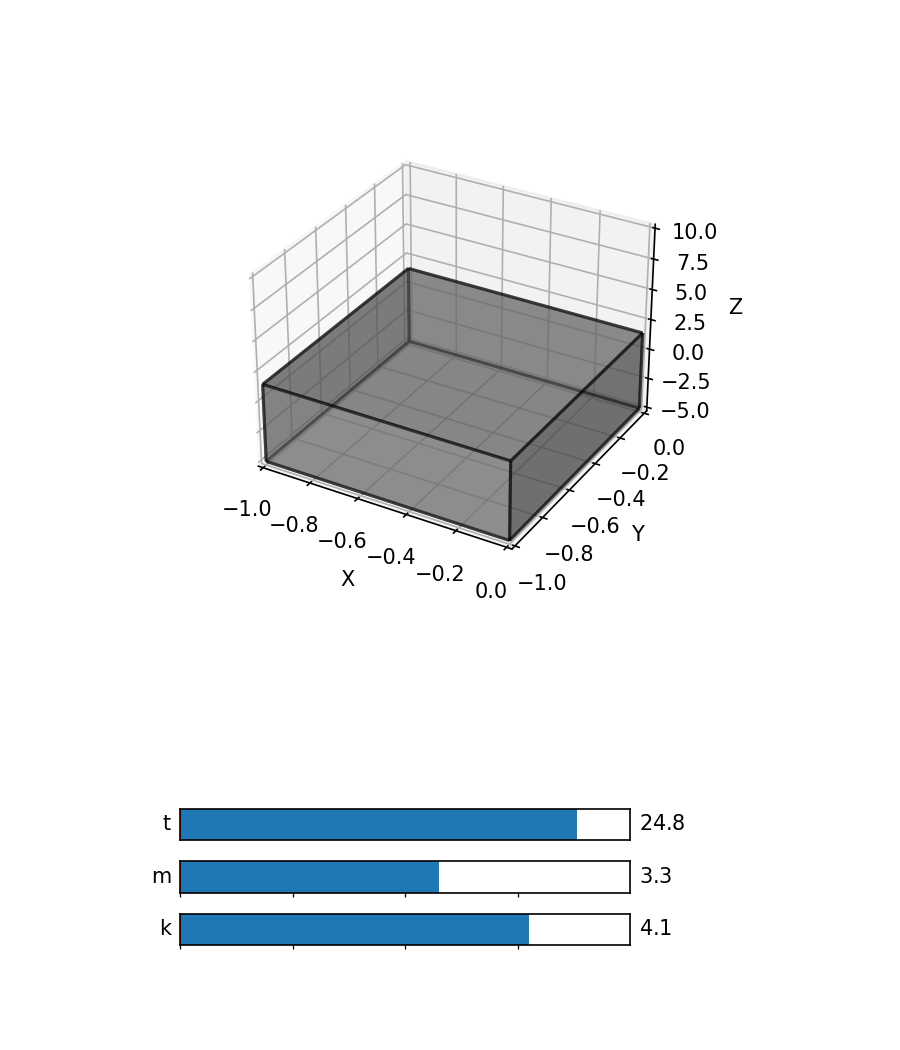

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
class plot3dCube(object):
    def __init__(self, origin, length, color):
        # origin[x,y,z], length[Lx,Ly,Lz], 
        self.g = 1
        self.origin = origin
        self.length = length
        #initial plot
        self.updateCube(origin,length)
        self.height = length[2]
        # create plot figure
        self.fig = plt.figure(figsize=(6,7))
        self.ax = self.fig.add_subplot(111, projection='3d')
        self.ax.set_xlim3d(-1, 0)
        self.ax.set_ylim3d(-1, 0)
        self.ax.set_zlim3d(-5, 10)
        self.ax.set_xlabel('X')
        self.ax.set_ylabel('Y')
        self.ax.set_zlabel('Z')
        # set color 
        self.color = color
        # dictionary of surfaces and edges
        self.dFrm = {}
        # surface variable name
        surface = "self.surface"
        # edge variable name
        edge = "self.edge"
        # generate frame and edge plots
        for i in range(len(self.sqrP)):
            # number
            n = str(i)
            self.dFrm[surface+n], self.dFrm[edge+n] = self.initFrame(self.sqrP[i][:])
        # slider plot
        # adjust plot
        plt.subplots_adjust(left = 0.1, bottom = 0.45)
        # input the position of sliders
        xSlider = plt.axes([0.2,0.2,0.5,0.03])
        ySlider = plt.axes([0.2,0.15,0.5,0.03])
        zSlider = plt.axes([0.2,0.1,0.5,0.03])
        xSlider.set_xticks(np.array([90,180,270]), minor = True)
        ySlider.set_xticks(np.array([1,2,3,4]), minor = True)
        zSlider.set_xticks(np.array([1,2,3,4]), minor = True)
        # input values and update graph
        self.slider1 = Slider(xSlider, 't', 0, 4*np.pi*np.sqrt(5), valinit = 0, valstep = 0.1)
        self.slider2 = Slider(ySlider, 'm', 1, 5, valinit = 1, valstep = 0.1)
        self.slider3 = Slider(zSlider, 'k', 1, 5, valinit = 1, valstep = 0.1)
        # updates the graph when input is changes
        self.slider1.on_changed(self.updateGraph)
        self.slider2.on_changed(self.updateGraph)
        self.slider3.on_changed(self.updateGraph)
    def updateCube(self,origin, length):
        Lx,Ly,Lz = length
        x1,y1,z1 = origin
        x2,y2,z2 = [length[i]+origin[i] for i in range(3)]
        # for A as X,Y,Z
        # A_1212 uses [[x1, x2][x1,x2]]
        # A_1122 is just X_1.T
        # A_1111 all x1
        # A_2222 all x2
        r = [x1, x2]
        X_1212 = np.array([r,r])
        X_1111 = np.ones(4).reshape(2, 2)*x1
        X_2222 = np.ones(4).reshape(2, 2)*x2
        r = [y1, y2]
        Y_1212, Y_1122 = np.meshgrid(r, r)
        Y_1111 = np.ones(4).reshape(2, 2)*y1
        Y_2222 = np.ones(4).reshape(2, 2)*y2
        r = [z1, z2]
        Z_1122 = np.array([r,r]).transpose()
        Z_1111 = np.ones(4).reshape(2, 2)*z1
        Z_2222 = np.ones(4).reshape(2, 2)*z2
        # points of the cube
        self.points = np.array([[x1, y1, z1],
                               [x2, y1, z1],
                               [x2, y2, z1],
                               [x1, y2, z1],
                               [x1, y1, z2],
                               [x2, y1, z2],
                               [x2, y2, z2],
                               [x1, y2, z2]])
        # square points for surface, edges
        self.sqrP = [[X_1212,Y_1122,Z_1111],[X_1212,Y_1122,Z_2222],
                     [X_1212,Y_1111,Z_1122],[X_1212,Y_2222,Z_1122],
                     [X_1111,Y_1212,Z_1122],[X_2222,Y_1212,Z_1122]]
    def initFrame(self, sqrP):
        surface = self.ax.plot_surface(sqrP[0],sqrP[1],sqrP[2],alpha=0.5,color=self.color[0])
        edge = self.ax.plot_wireframe(sqrP[0],sqrP[1],sqrP[2],alpha=0.5,color=self.color[1])
        return surface, edge
    def updateGraph(self, event):
        t, m, k = self.slider1.val, self.slider2.val, self.slider3.val
        g = self.g
        z = (g*m-g*m*np.cos(np.sqrt(k/m)*t))/k
        self.origin[2] = z
        self.length[2] = self.height - z
        self.updateCube(self.origin, self.length)
        self.updateFrames()
    def updateFrame(self, surface, edge, X, Y, Z):
        #destory previous surfaces and edges
        surface.remove()
        edge.remove()
        # plot surfaces and edges
        surface = self.ax.plot_surface(X,Y,Z, alpha = 0.5, color = self.color[0])
        edge = self.ax.plot_wireframe(X,Y,Z, alpha = 0.5, color = self.color[1])
        return surface, edge
    def updateFrames(self):        
        surface = "self.surface"
        edge = "self.edge"
        # destroy current surface and edge, new surface and edge
        for j in range(6):
            n = str(j)
            self.dFrm[surface+n], self.dFrm[edge+n]= self.updateFrame(self.dFrm[surface+n],self.dFrm[edge+n], 
                                                             self.sqrP[j][0],self.sqrP[j][1],self.sqrP[j][2])
        plt.draw()
        plt.pause(.01)
# main function
p = plot3dCube([0,0,0], [-1,-1,-5],["grey","black"])

9.1.5.1

<IPython.core.display.Javascript object>


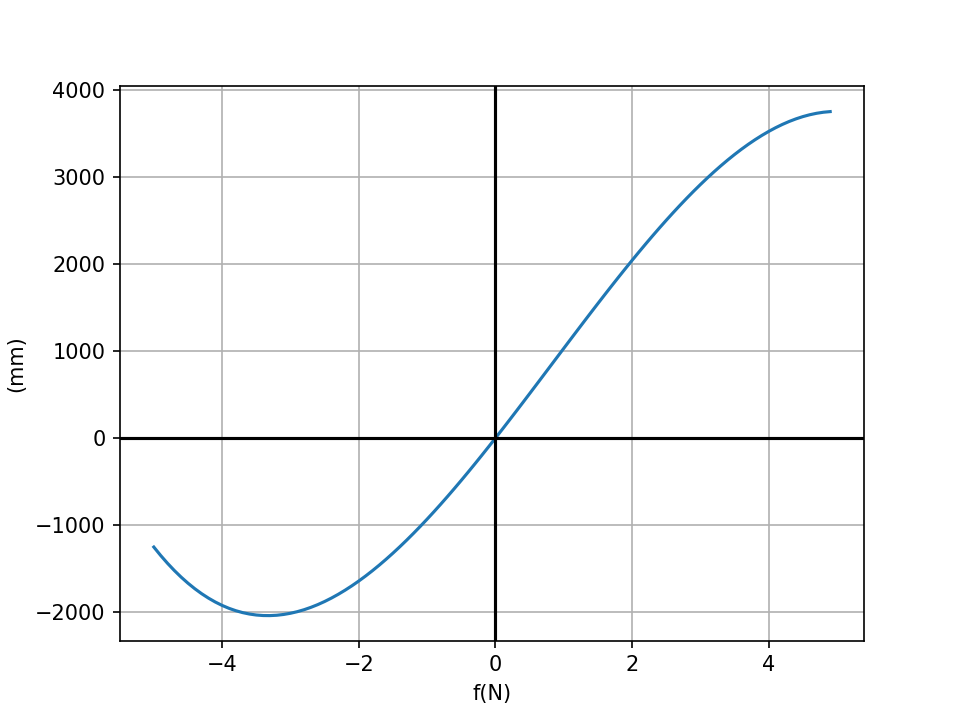

'E_{full extension}'

11458.3333333333

'E_{full contraction}'

7291.66666666667

'Raphson method'

'@3kN, x ='

3.12097081244246

'@-1kN, x ='

-1.08427770537746

'Unstable behaviour of the spring'

'x ='

[-3.33333333333333, 5.00000000000000]

'Tension limits'

'f(-3.33) = '

-2037.03703703704

'f(5) ='

3750

In [4]:
import sympy as sp
import numpy as np
from sympy import integrate, lambdify, solve
from matplotlib import pyplot as plt
from mpmath import findroot, mp
mp.pretty = True
x = sp.symbols("x")
f = 1000*x+50*x**2-20*x**3
F = lambdify(x,f)
xL = np.arange(-5,5,0.1)
y = F(xL)
fig, ax = plt.subplots()
plt.xlabel("f(N)")
plt.ylabel("(mm)")
ax.plot(xL, y)
ax.grid(True, which='both')
ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')
display("E_{full extension}",integrate(f,(x, 0, 5)).evalf())
display("E_{full contraction}",integrate(f,(x, 0, -5)).evalf())
f1 = 1000*x+50*x**2-20*x**3-3000
display("Raphson method")
func = lambdify(x, f1)
sol = findroot(func,0)
display("@3kN, x =",sol)
f2 = 1000*x+50*x**2-20*x**3+1000
func = lambdify(x, f2)
sol = findroot(func,0)
display("@-1kN, x =",sol)
display("Unstable behaviour of the spring")
a = f.diff(x)
sol = solve(a,x)
display("x =",[i.evalf() for i in sol])
display("Tension limits")
display("f(-3.33) = ",f.subs({x:sol[0]}).evalf())
display("f(5) =",f.subs({x:sol[1]}))

9.2.2.1

In [5]:
import sympy as sp
import numpy as np
from sympy import Matrix, simplify, diff, eye, det
from matplotlib import pyplot as plt
theta = sp.symbols("theta")
Q = Matrix([[sp.cos(theta), sp.sin(theta),0],
            [-sp.sin(theta),sp.cos(theta), 0],
            [0,0,1]])
Q = Q.subs({theta:sp.pi/2})
display("Q =", Q)
X1,X2,X3 = sp.symbols("X_1 X_2 X_3")
a,b,c = sp.symbols("a b c")
ea,eb,ec,t = sp.symbols("epsilon_a epsilon_b epsilon_c t")
f0 = sp.symbols("f_0")
xi1 = (1+t*ea)*X1
xi2 = (1-t*eb)*X2
xi3 = (1-t*ec)*X3
xi = Matrix([xi1, xi2, xi3])
x = Q*xi
X = Matrix([X1,X2,X3])
U = Matrix([[diff(i,j) for j in X] for i in xi])
display("Matrix U appearing in the Right polar decomposition of the deformation gradient F")
display("U =", U)
Udot = diff(U,t)
display("Udot =",Udot)
F = Matrix([[diff(i,j) for j in X] for i in x])
display("Deformation gradient F =",F)
V = F*Q.T
display("Matrix V appearing in the Right polar decomposition of the deformation gradient  F")
display("V =",V)
Fdot = diff(F,t)
display("Fdot =",Fdot)
L = Fdot*F.inv()
display("L =",L)
display("L @t=0.5 = ", L.subs({t:0.5}))
display("L @t=1 = ", L.subs({t:1}))
Dd = 1/2*(L+L.T)
display("Symmetric part of L", Dd)
Elagrange = 1/2*(F.T*F-eye(3))
display("Green Strain =",Elagrange)
Elagrangedot = diff(Elagrange,t)
display("Green Strain Rate =",Elagrangedot)
sigmalocal = Matrix([[t*f0/(b*c*(1-t*eb)*(1-t*ec)),0,0],[0,0,0],[0,0,0]])
Cauchy = Q*sigmalocal*Q.T
display("Cauchy stress =",Cauchy)
display("Cauchy stress @t=0:",Cauchy.subs({t:0}))
display("Cauchy stress @t=0.5:",Cauchy.subs({t:0.5}))
display("Cauchy stress @t=1:",Cauchy.subs({t:1}))
P = simplify(det(F)*Cauchy*F.T.inv())
display("P =",P)
display("P @ t=0",P.subs({t:0}))
display("P @ t=0.5",P.subs({t:0.5}))
display("P @ t=1",P.subs({t:1}))
S = F.inv()*P
display("S =",S)
display("S @ t=0",S.subs({t:0}))
display("S @ t=0.5",S.subs({t:0.5}))
display("S @ t=1",S.subs({t:1}))
# code is the same below
e1 = sum([sum([Cauchy[i,j]*Dd[i,j] for i in range(3)]) for j in range(3)])
#e1 = sum([Cauchy[i]*Dd[i] for i in range(9)])
e1 = sum([Cauchy[i]*Dd[i] for i in range(9)])
display("Cauchy",Cauchy,"Dd",Dd)
display("D and Cauchy are energy conjugates: dU/dt", e1)
e2 = sum([P[i]*Fdot[i] for i in range(9)])
display("P",P,"Fdot",Fdot)
display("P and Fdot are energy conjugates: dW/dt", e2)
e2 = sum([S[i]*Elagrangedot[i] for i in range(9)])
display("S",S,"E_Green",Elagrangedot)
display("S and E_Green are energy conjugates: dW/dt", e2)

'Q ='

Matrix([
[ 0, 1, 0],
[-1, 0, 0],
[ 0, 0, 1]])

'Matrix U appearing in the Right polar decomposition of the deformation gradient F'

'U ='

Matrix([
[epsilon_a*t + 1,                0,                0],
[              0, -epsilon_b*t + 1,                0],
[              0,                0, -epsilon_c*t + 1]])

'Udot ='

Matrix([
[epsilon_a,          0,          0],
[        0, -epsilon_b,          0],
[        0,          0, -epsilon_c]])

'Deformation gradient F ='

Matrix([
[               0, -epsilon_b*t + 1,                0],
[-epsilon_a*t - 1,                0,                0],
[               0,                0, -epsilon_c*t + 1]])

'Matrix V appearing in the Right polar decomposition of the deformation gradient  F'

'V ='

Matrix([
[-epsilon_b*t + 1,               0,                0],
[               0, epsilon_a*t + 1,                0],
[               0,               0, -epsilon_c*t + 1]])

'Fdot ='

Matrix([
[         0, -epsilon_b,          0],
[-epsilon_a,          0,          0],
[         0,          0, -epsilon_c]])

'L ='

Matrix([
[-epsilon_b/(-epsilon_b*t + 1),                             0,                             0],
[                            0, -epsilon_a/(-epsilon_a*t - 1),                             0],
[                            0,                             0, -epsilon_c/(-epsilon_c*t + 1)]])

'L @t=0.5 = '

Matrix([
[-epsilon_b/(1 - 0.5*epsilon_b),                               0,                              0],
[                             0, -epsilon_a/(-0.5*epsilon_a - 1),                              0],
[                             0,                               0, -epsilon_c/(1 - 0.5*epsilon_c)]])

'L @t=1 = '

Matrix([
[-epsilon_b/(1 - epsilon_b),                           0,                          0],
[                         0, -epsilon_a/(-epsilon_a - 1),                          0],
[                         0,                           0, -epsilon_c/(1 - epsilon_c)]])

'Symmetric part of L'

Matrix([
[-1.0*epsilon_b/(-epsilon_b*t + 1),                                 0,                                 0],
[                                0, -1.0*epsilon_a/(-epsilon_a*t - 1),                                 0],
[                                0,                                 0, -1.0*epsilon_c/(-epsilon_c*t + 1)]])

'Green Strain ='

Matrix([
[0.5*(-epsilon_a*t - 1)**2 - 0.5,                               0,                               0],
[                              0, 0.5*(-epsilon_b*t + 1)**2 - 0.5,                               0],
[                              0,                               0, 0.5*(-epsilon_c*t + 1)**2 - 0.5]])

'Green Strain Rate ='

Matrix([
[-1.0*epsilon_a*(-epsilon_a*t - 1),                                 0,                                 0],
[                                0, -1.0*epsilon_b*(-epsilon_b*t + 1),                                 0],
[                                0,                                 0, -1.0*epsilon_c*(-epsilon_c*t + 1)]])

'Cauchy stress ='

Matrix([
[0,                                                 0, 0],
[0, f_0*t/(b*c*(-epsilon_b*t + 1)*(-epsilon_c*t + 1)), 0],
[0,                                                 0, 0]])

'Cauchy stress @t=0:'

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

'Cauchy stress @t=0.5:'

Matrix([
[0,                                                     0, 0],
[0, 0.5*f_0/(b*c*(1 - 0.5*epsilon_b)*(1 - 0.5*epsilon_c)), 0],
[0,                                                     0, 0]])

'Cauchy stress @t=1:'

Matrix([
[0,                                         0, 0],
[0, f_0/(b*c*(1 - epsilon_b)*(1 - epsilon_c)), 0],
[0,                                         0, 0]])

'P ='

Matrix([
[           0, 0, 0],
[-f_0*t/(b*c), 0, 0],
[           0, 0, 0]])

'P @ t=0'

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

'P @ t=0.5'

Matrix([
[             0, 0, 0],
[-0.5*f_0/(b*c), 0, 0],
[             0, 0, 0]])

'P @ t=1'

Matrix([
[         0, 0, 0],
[-f_0/(b*c), 0, 0],
[         0, 0, 0]])

'S ='

Matrix([
[-f_0*t/(b*c*(-epsilon_a*t - 1)), 0, 0],
[                              0, 0, 0],
[                              0, 0, 0]])

'S @ t=0'

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

'S @ t=0.5'

Matrix([
[-0.5*f_0/(b*c*(-0.5*epsilon_a - 1)), 0, 0],
[                                  0, 0, 0],
[                                  0, 0, 0]])

'S @ t=1'

Matrix([
[-f_0/(b*c*(-epsilon_a - 1)), 0, 0],
[                          0, 0, 0],
[                          0, 0, 0]])

'Cauchy'

Matrix([
[0,                                                 0, 0],
[0, f_0*t/(b*c*(-epsilon_b*t + 1)*(-epsilon_c*t + 1)), 0],
[0,                                                 0, 0]])

'Dd'

Matrix([
[-1.0*epsilon_b/(-epsilon_b*t + 1),                                 0,                                 0],
[                                0, -1.0*epsilon_a/(-epsilon_a*t - 1),                                 0],
[                                0,                                 0, -1.0*epsilon_c/(-epsilon_c*t + 1)]])

'D and Cauchy are energy conjugates: dU/dt'

-1.0*epsilon_a*f_0*t/(b*c*(-epsilon_a*t - 1)*(-epsilon_b*t + 1)*(-epsilon_c*t + 1))

'P'

Matrix([
[           0, 0, 0],
[-f_0*t/(b*c), 0, 0],
[           0, 0, 0]])

'Fdot'

Matrix([
[         0, -epsilon_b,          0],
[-epsilon_a,          0,          0],
[         0,          0, -epsilon_c]])

'P and Fdot are energy conjugates: dW/dt'

epsilon_a*f_0*t/(b*c)

'S'

Matrix([
[-f_0*t/(b*c*(-epsilon_a*t - 1)), 0, 0],
[                              0, 0, 0],
[                              0, 0, 0]])

'E_Green'

Matrix([
[-1.0*epsilon_a*(-epsilon_a*t - 1),                                 0,                                 0],
[                                0, -1.0*epsilon_b*(-epsilon_b*t + 1),                                 0],
[                                0,                                 0, -1.0*epsilon_c*(-epsilon_c*t + 1)]])

'S and E_Green are energy conjugates: dW/dt'

1.0*epsilon_a*f_0*t/(b*c)

9.2.2.2

In [6]:
import sympy as sp
import numpy as np
from sympy import Matrix, simplify, diff, eye, det
from matplotlib import pyplot as plt
theta = sp.symbols("theta")
X1,X2,X3 = sp.symbols("X_1 X_2 X_3")
a,b,c = sp.symbols("a b c")
ea,eb,ec,t = sp.symbols("epsilon_a epsilon_b epsilon_c t")
f0 = sp.symbols("f_0")
Q = Matrix([[sp.cos(theta*t), sp.sin(theta*t),0],
            [-sp.sin(theta*t),sp.cos(theta*t), 0],
            [0,0,1]])
Q = Q.subs({theta:sp.pi/2})
display("Q =", Q)
xi1 = (1+t*ea)*X1
xi2 = (1-t*eb)*X2
xi3 = (1-t*ec)*X3
xi = Matrix([xi1, xi2, xi3])
x = Q*xi
X = Matrix([X1,X2,X3])
U = Matrix([[diff(i,j) for j in X] for i in xi])
display("The matrix U appearing in the Right Polar Decomposition of the Deformation Gradient F:")
display("U =", U)
Udot = diff(U,t)
display("Udot =",Udot)
F = Matrix([[diff(i,j) for j in X] for i in x])
display("F =",F)
V = simplify(F*Q.T)
display("The matrix V appearing in the Right Polar Decomposition of the Deformation Gradient F:")
display("Deformation gradient F =",V)
Fdot = simplify(diff(F,t))
display("Fdot =",Fdot)
L = simplify(Fdot*F.inv())
display("L =",L)
display("L @t=0.5 = ",L.subs({t:0.5}))
display("L @t=1 = ",L.subs({t:1}))
Dd = simplify(1/2*(L+L.T))
display("Symmetric part of L", Dd)
Elagrange = simplify(1/2*(F.T*F-eye(3)))
display("Green Strain =",Elagrange)
Elagrangedot = diff(Elagrange,t)
display("Green Strain rate =",Elagrangedot)
sigmalocal = Matrix([[t*f0/(b*c*(1-t*eb)*(1-t*ec)),0,0],[0,0,0],[0,0,0]])
Cauchy = simplify(Q*sigmalocal*Q.T)
display("Cauchy stress =",Cauchy)
display("Cauchy stress @t=0:",Cauchy.subs({t:0}))
display("Cauchy stress @t=0.5:",Cauchy.subs({t:0.5}))
display("Cauchy stress @t=1:",Cauchy.subs({t:1}))
P = simplify(det(F)*Cauchy*F.T.inv())
display("P =",P)
display("P @ t=0",P.subs({t:0}))
display("P @ t=0.5",P.subs({t:0.5}))
display("P @ t=1",P.subs({t:1}))
S = simplify(F.inv()*P)
display("S =",S)
display("S @ t=0",S.subs({t:0}))
display("S @ t=0.5",S.subs({t:0.5}))
display("S @ t=1",S.subs({t:1}))
e1 = sum([Cauchy[i]*Dd[i] for i in range(9)])
display("P",P,"Fdot",Fdot)
display("D and Cauchy are energy conjugates: dU/dt", simplify(e1))
e2 = sum([P[i]*Fdot[i] for i in range(9)])
display("P",P,"Fdot",Fdot)
display("P and Fdot are energy conjugates: dW/dt", simplify(e2))
e2 = sum([S[i]*Elagrangedot[i] for i in range(9)])
display("S",S,"E_Green",Elagrangedot)
display("S and E_Green are energy conjugates: dW/dt", simplify(e2))

'Q ='

Matrix([
[ cos(pi*t/2), sin(pi*t/2), 0],
[-sin(pi*t/2), cos(pi*t/2), 0],
[           0,           0, 1]])

'The matrix U appearing in the Right Polar Decomposition of the Deformation Gradient F:'

'U ='

Matrix([
[epsilon_a*t + 1,                0,                0],
[              0, -epsilon_b*t + 1,                0],
[              0,                0, -epsilon_c*t + 1]])

'Udot ='

Matrix([
[epsilon_a,          0,          0],
[        0, -epsilon_b,          0],
[        0,          0, -epsilon_c]])

'F ='

Matrix([
[ (epsilon_a*t + 1)*cos(pi*t/2), (-epsilon_b*t + 1)*sin(pi*t/2),                0],
[(-epsilon_a*t - 1)*sin(pi*t/2), (-epsilon_b*t + 1)*cos(pi*t/2),                0],
[                             0,                              0, -epsilon_c*t + 1]])

'The matrix V appearing in the Right Polar Decomposition of the Deformation Gradient F:'

'Deformation gradient F ='

Matrix([
[(epsilon_a*t + 1)*cos(pi*t/2)**2 + (-epsilon_b*t + 1)*sin(pi*t/2)**2,                               -t*(epsilon_a + epsilon_b)*sin(pi*t)/2,                0],
[                              -t*(epsilon_a + epsilon_b)*sin(pi*t)/2, (epsilon_a*t + 1)*sin(pi*t/2)**2 + (-epsilon_b*t + 1)*cos(pi*t/2)**2,                0],
[                                                                   0,                                                                    0, -epsilon_c*t + 1]])

'Fdot ='

Matrix([
[ epsilon_a*cos(pi*t/2) - pi*(epsilon_a*t + 1)*sin(pi*t/2)/2, -epsilon_b*sin(pi*t/2) - pi*(epsilon_b*t - 1)*cos(pi*t/2)/2,          0],
[-epsilon_a*sin(pi*t/2) - pi*(epsilon_a*t + 1)*cos(pi*t/2)/2, -epsilon_b*cos(pi*t/2) + pi*(epsilon_b*t - 1)*sin(pi*t/2)/2,          0],
[                                                          0,                                                           0, -epsilon_c]])

'L ='

Matrix([
[     (epsilon_a*epsilon_b*t + epsilon_a*sin(pi*t/2)**2 - epsilon_a + epsilon_b*sin(pi*t/2)**2)/(epsilon_a*epsilon_b*t**2 - epsilon_a*t + epsilon_b*t - 1), (pi*epsilon_a*epsilon_b*t**2 - pi*epsilon_a*t + epsilon_a*sin(pi*t) + pi*epsilon_b*t + epsilon_b*sin(pi*t) - pi)/(2*(epsilon_a*t + 1)*(epsilon_b*t - 1)),                           0],
[(-pi*epsilon_a*epsilon_b*t**2 + pi*epsilon_a*t + epsilon_a*sin(pi*t) - pi*epsilon_b*t + epsilon_b*sin(pi*t) + pi)/(2*(epsilon_a*t + 1)*(epsilon_b*t - 1)),     (epsilon_a*epsilon_b*t - epsilon_a*sin(pi*t/2)**2 - epsilon_b*sin(pi*t/2)**2 + epsilon_b)/(epsilon_a*epsilon_b*t**2 - epsilon_a*t + epsilon_b*t - 1),                           0],
[                                                                                                                                                        0,                                                                                                                                                        0, e

'L @t=0.5 = '

Matrix([
[                         (0.5*epsilon_a*epsilon_b - epsilon_a/2 + epsilon_b/2)/(0.25*epsilon_a*epsilon_b - 0.5*epsilon_a + 0.5*epsilon_b - 1), (0.25*pi*epsilon_a*epsilon_b - 0.5*pi*epsilon_a + epsilon_a + epsilon_b + 0.5*pi*epsilon_b - pi)/(2*(0.5*epsilon_a + 1)*(0.5*epsilon_b - 1)),                             0],
[(-0.25*pi*epsilon_a*epsilon_b + epsilon_a + 0.5*pi*epsilon_a - 0.5*pi*epsilon_b + epsilon_b + pi)/(2*(0.5*epsilon_a + 1)*(0.5*epsilon_b - 1)),                         (0.5*epsilon_a*epsilon_b - epsilon_a/2 + epsilon_b/2)/(0.25*epsilon_a*epsilon_b - 0.5*epsilon_a + 0.5*epsilon_b - 1),                             0],
[                                                                                                                                            0,                                                                                                                                            0, epsilon_c/(0.5*epsilon_c - 1)]])

'L @t=1 = '

Matrix([
[             (epsilon_a*epsilon_b + epsilon_b)/(epsilon_a*epsilon_b - epsilon_a + epsilon_b - 1), (pi*epsilon_a*epsilon_b - pi*epsilon_a + pi*epsilon_b - pi)/(2*(epsilon_a + 1)*(epsilon_b - 1)),                         0],
[(-pi*epsilon_a*epsilon_b + pi*epsilon_a - pi*epsilon_b + pi)/(2*(epsilon_a + 1)*(epsilon_b - 1)),             (epsilon_a*epsilon_b - epsilon_a)/(epsilon_a*epsilon_b - epsilon_a + epsilon_b - 1),                         0],
[                                                                                               0,                                                                                               0, epsilon_c/(epsilon_c - 1)]])

'Symmetric part of L'

Matrix([
[1.0*(epsilon_a*epsilon_b*t + epsilon_a*sin(pi*t/2)**2 - epsilon_a + epsilon_b*sin(pi*t/2)**2)/(epsilon_a*epsilon_b*t**2 - epsilon_a*t + epsilon_b*t - 1),                                                                              0.5*(epsilon_a + epsilon_b)*sin(pi*t)/((epsilon_a*t + 1)*(epsilon_b*t - 1)),                               0],
[                                                                             0.5*(epsilon_a + epsilon_b)*sin(pi*t)/((epsilon_a*t + 1)*(epsilon_b*t - 1)), 1.0*(epsilon_a*epsilon_b*t - epsilon_a*sin(pi*t/2)**2 - epsilon_b*sin(pi*t/2)**2 + epsilon_b)/(epsilon_a*epsilon_b*t**2 - epsilon_a*t + epsilon_b*t - 1),                               0],
[                                                                                                                                                       0,                                                                                                                                                       

'Green Strain ='

Matrix([
[0.5*epsilon_a*t*(epsilon_a*t + 2),                                 0,                              0],
[                                0, 0.5*epsilon_b*t*(epsilon_b*t - 2),                              0],
[                                0,                                 0, 0.5*(epsilon_c*t - 1)**2 - 0.5]])

'Green Strain rate ='

Matrix([
[0.5*epsilon_a**2*t + 0.5*epsilon_a*(epsilon_a*t + 2),                                                    0,                               0],
[                                                   0, 0.5*epsilon_b**2*t + 0.5*epsilon_b*(epsilon_b*t - 2),                               0],
[                                                   0,                                                    0, 1.0*epsilon_c*(epsilon_c*t - 1)]])

'Cauchy stress ='

Matrix([
[f_0*t*cos(pi*t/2)**2/(b*c*(epsilon_b*t - 1)*(epsilon_c*t - 1)),   -f_0*t*sin(pi*t)/(2*b*c*(epsilon_b*t - 1)*(epsilon_c*t - 1)), 0],
[  -f_0*t*sin(pi*t)/(2*b*c*(epsilon_b*t - 1)*(epsilon_c*t - 1)), f_0*t*sin(pi*t/2)**2/(b*c*(epsilon_b*t - 1)*(epsilon_c*t - 1)), 0],
[                                                             0,                                                              0, 0]])

'Cauchy stress @t=0:'

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

'Cauchy stress @t=0.5:'

Matrix([
[ 0.25*f_0/(b*c*(0.5*epsilon_b - 1)*(0.5*epsilon_c - 1)), -0.25*f_0/(b*c*(0.5*epsilon_b - 1)*(0.5*epsilon_c - 1)), 0],
[-0.25*f_0/(b*c*(0.5*epsilon_b - 1)*(0.5*epsilon_c - 1)),  0.25*f_0/(b*c*(0.5*epsilon_b - 1)*(0.5*epsilon_c - 1)), 0],
[                                                      0,                                                       0, 0]])

'Cauchy stress @t=1:'

Matrix([
[0,                                         0, 0],
[0, f_0/(b*c*(epsilon_b - 1)*(epsilon_c - 1)), 0],
[0,                                         0, 0]])

'P ='

Matrix([
[ f_0*t*cos(pi*t/2)/(b*c), 0, 0],
[-f_0*t*sin(pi*t/2)/(b*c), 0, 0],
[                       0, 0, 0]])

'P @ t=0'

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

'P @ t=0.5'

Matrix([
[ 0.25*sqrt(2)*f_0/(b*c), 0, 0],
[-0.25*sqrt(2)*f_0/(b*c), 0, 0],
[                      0, 0, 0]])

'P @ t=1'

Matrix([
[         0, 0, 0],
[-f_0/(b*c), 0, 0],
[         0, 0, 0]])

'S ='

Matrix([
[f_0*t/(b*c*(epsilon_a*t + 1)), 0, 0],
[                            0, 0, 0],
[                            0, 0, 0]])

'S @ t=0'

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

'S @ t=0.5'

Matrix([
[0.5*f_0/(b*c*(0.5*epsilon_a + 1)), 0, 0],
[                                0, 0, 0],
[                                0, 0, 0]])

'S @ t=1'

Matrix([
[f_0/(b*c*(epsilon_a + 1)), 0, 0],
[                        0, 0, 0],
[                        0, 0, 0]])

'P'

Matrix([
[ f_0*t*cos(pi*t/2)/(b*c), 0, 0],
[-f_0*t*sin(pi*t/2)/(b*c), 0, 0],
[                       0, 0, 0]])

'Fdot'

Matrix([
[ epsilon_a*cos(pi*t/2) - pi*(epsilon_a*t + 1)*sin(pi*t/2)/2, -epsilon_b*sin(pi*t/2) - pi*(epsilon_b*t - 1)*cos(pi*t/2)/2,          0],
[-epsilon_a*sin(pi*t/2) - pi*(epsilon_a*t + 1)*cos(pi*t/2)/2, -epsilon_b*cos(pi*t/2) + pi*(epsilon_b*t - 1)*sin(pi*t/2)/2,          0],
[                                                          0,                                                           0, -epsilon_c]])

'D and Cauchy are energy conjugates: dU/dt'

f_0*t*(-0.5*(epsilon_a + epsilon_b)*(epsilon_a*epsilon_b*t**2 - epsilon_a*t + epsilon_b*t - 1)*sin(pi*t)**2 + 1.0*(epsilon_a*t + 1)*(epsilon_b*t - 1)*(epsilon_a*epsilon_b*t - 2*epsilon_a*sin(pi*t/2)**4 + 2*epsilon_a*sin(pi*t/2)**2 - epsilon_a - 2*epsilon_b*sin(pi*t/2)**4 + 2*epsilon_b*sin(pi*t/2)**2))/(b*c*(epsilon_a*t + 1)*(epsilon_b*t - 1)**2*(epsilon_c*t - 1)*(epsilon_a*epsilon_b*t**2 - epsilon_a*t + epsilon_b*t - 1))

'P'

Matrix([
[ f_0*t*cos(pi*t/2)/(b*c), 0, 0],
[-f_0*t*sin(pi*t/2)/(b*c), 0, 0],
[                       0, 0, 0]])

'Fdot'

Matrix([
[ epsilon_a*cos(pi*t/2) - pi*(epsilon_a*t + 1)*sin(pi*t/2)/2, -epsilon_b*sin(pi*t/2) - pi*(epsilon_b*t - 1)*cos(pi*t/2)/2,          0],
[-epsilon_a*sin(pi*t/2) - pi*(epsilon_a*t + 1)*cos(pi*t/2)/2, -epsilon_b*cos(pi*t/2) + pi*(epsilon_b*t - 1)*sin(pi*t/2)/2,          0],
[                                                          0,                                                           0, -epsilon_c]])

'P and Fdot are energy conjugates: dW/dt'

epsilon_a*f_0*t/(b*c)

'S'

Matrix([
[f_0*t/(b*c*(epsilon_a*t + 1)), 0, 0],
[                            0, 0, 0],
[                            0, 0, 0]])

'E_Green'

Matrix([
[0.5*epsilon_a**2*t + 0.5*epsilon_a*(epsilon_a*t + 2),                                                    0,                               0],
[                                                   0, 0.5*epsilon_b**2*t + 0.5*epsilon_b*(epsilon_b*t - 2),                               0],
[                                                   0,                                                    0, 1.0*epsilon_c*(epsilon_c*t - 1)]])

'S and E_Green are energy conjugates: dW/dt'

1.0*epsilon_a*f_0*t/(b*c)

9.2.2.3

In [7]:
import sympy as sp
import numpy as np
from sympy import Matrix, simplify, diff, eye, det
display("Extension")
theta = sp.symbols("theta")
X1,X2,X3 = sp.symbols("X_1 X_2 X_3")
X = Matrix([X1,X2,X3])
a,b,c = sp.symbols("a b c")
ea,eb,ec,t = sp.symbols("epsilon_a epsilon_b epsilon_c t")
f0 = sp.symbols("f_0")
xe1 = (1+t*ea)*X1
xe2 = (1-t*eb)*X2
xe3 = (1-t*ec)*X3
xe = Matrix([xe1, xe2, xe3])
F = Matrix([[diff(i,j) for j in X] for i in xe])
display("F =",F)
Elagrange = simplify(1/2*(F.T*F-eye(3)))
display("Lagrange Strain =",Elagrange)
Elagrangedot = diff(Elagrange,t)
display("Lagrange Strain rate =",Elagrangedot)
Fdot = simplify(diff(F,t))
display("Fdot =",Fdot)
L = simplify(Fdot*F.inv())
display("Velocity gradient (L) =",L)
Dd = simplify(1/2*(L+L.T))
display("Symmetric part of L", Dd)
Cauchy = Matrix([[t*f0/(b*c*(1-t*eb)*(1-t*ec)),0,0],[0,0,0],[0,0,0]])
display("Cauchy =",Cauchy)
P = simplify(det(F)*Cauchy*F.T.inv())
display("First Piola =",P)
S = simplify(F.inv()*P)
display("Second Piola =",S)
e1 = sum([Cauchy[i]*Dd[i] for i in range(9)])
display("Cauchy",Cauchy,"Dd",Dd)
display("D and Cauchy are energy conjugates: dU/dt", simplify(e1))
e2 = sum([P[i]*Fdot[i] for i in range(9)])
display("P",P,"Fdot",Fdot)
display("P and Fdot are energy conjugates: dW/dt", simplify(e2))
e2 = sum([S[i]*Elagrangedot[i] for i in range(9)])
display("S",S,"E_Green",Elagrangedot)
display("S and E_Green are energy conjugates: dW/dt", simplify(e2))
display("Rotation")
xe = xe.subs({t:1})
Q = Matrix([[sp.cos(theta*(t-1)), sp.sin(theta*(t-1)),0],
            [-sp.sin(theta*(t-1)),sp.cos(theta*(t-1)), 0],
            [0,0,1]])
Q = Q.subs({theta:sp.pi/2})
display("Q =", Q)
x = Q*xe
F = Matrix([[diff(i,j) for j in X] for i in x])
display("F =",F)
Elagrange = simplify(1/2*(F.T*F-eye(3)))
display("Lagrange Strain =",Elagrange)
Elagrangedot = diff(Elagrange,t)
display("Lagrange Strain rate =",Elagrangedot)
Fdot = simplify(diff(F,t))
display("Fdot =",Fdot)
L = simplify(Fdot*F.inv())
display("Velocity gradient (L) =",L)
Dd = simplify(1/2*(L+L.T))
display("Symmetric part of L", Dd)
sigmalocal = Cauchy.subs({t:1})
Cauchy = simplify(Q*sigmalocal*Q.T)
display("Cauchy =",Cauchy)
P = simplify(det(F)*Cauchy*F.T.inv())
display("First Piola =",P)
S = simplify(F.inv()*P)
display("Second Piola =",S)
e1 = sum([Cauchy[i]*Dd[i] for i in range(9)])
display("Cauchy",Cauchy,"Dd",Dd)
display("D and Cauchy are energy conjugates: dU/dt", simplify(e1))
e2 = sum([P[i]*Fdot[i] for i in range(9)])
display("P",P,"Fdot",Fdot)
display("P and Fdot are energy conjugates: dW/dt", simplify(e2))
e2 = sum([S[i]*Elagrangedot[i] for i in range(9)])
display("S",S,"E_Green",Elagrangedot)
display("S and E_Green are energy conjugates: dW/dt", simplify(e2))

'Extension'

'F ='

Matrix([
[epsilon_a*t + 1,                0,                0],
[              0, -epsilon_b*t + 1,                0],
[              0,                0, -epsilon_c*t + 1]])

'Lagrange Strain ='

Matrix([
[0.5*(epsilon_a*t + 1)**2 - 0.5,                              0,                              0],
[                             0, 0.5*(epsilon_b*t - 1)**2 - 0.5,                              0],
[                             0,                              0, 0.5*(epsilon_c*t - 1)**2 - 0.5]])

'Lagrange Strain rate ='

Matrix([
[1.0*epsilon_a*(epsilon_a*t + 1),                               0,                               0],
[                              0, 1.0*epsilon_b*(epsilon_b*t - 1),                               0],
[                              0,                               0, 1.0*epsilon_c*(epsilon_c*t - 1)]])

'Fdot ='

Matrix([
[epsilon_a,          0,          0],
[        0, -epsilon_b,          0],
[        0,          0, -epsilon_c]])

'Velocity gradient (L) ='

Matrix([
[epsilon_a/(epsilon_a*t + 1),                           0,                           0],
[                          0, epsilon_b/(epsilon_b*t - 1),                           0],
[                          0,                           0, epsilon_c/(epsilon_c*t - 1)]])

'Symmetric part of L'

Matrix([
[1.0*epsilon_a/(epsilon_a*t + 1),                               0,                               0],
[                              0, 1.0*epsilon_b/(epsilon_b*t - 1),                               0],
[                              0,                               0, 1.0*epsilon_c/(epsilon_c*t - 1)]])

'Cauchy ='

Matrix([
[f_0*t/(b*c*(-epsilon_b*t + 1)*(-epsilon_c*t + 1)), 0, 0],
[                                                0, 0, 0],
[                                                0, 0, 0]])

'First Piola ='

Matrix([
[f_0*t/(b*c), 0, 0],
[          0, 0, 0],
[          0, 0, 0]])

'Second Piola ='

Matrix([
[f_0*t/(b*c*(epsilon_a*t + 1)), 0, 0],
[                            0, 0, 0],
[                            0, 0, 0]])

'Cauchy'

Matrix([
[f_0*t/(b*c*(-epsilon_b*t + 1)*(-epsilon_c*t + 1)), 0, 0],
[                                                0, 0, 0],
[                                                0, 0, 0]])

'Dd'

Matrix([
[1.0*epsilon_a/(epsilon_a*t + 1),                               0,                               0],
[                              0, 1.0*epsilon_b/(epsilon_b*t - 1),                               0],
[                              0,                               0, 1.0*epsilon_c/(epsilon_c*t - 1)]])

'D and Cauchy are energy conjugates: dU/dt'

1.0*epsilon_a*f_0*t/(b*c*(epsilon_a*t + 1)*(epsilon_b*t - 1)*(epsilon_c*t - 1))

'P'

Matrix([
[f_0*t/(b*c), 0, 0],
[          0, 0, 0],
[          0, 0, 0]])

'Fdot'

Matrix([
[epsilon_a,          0,          0],
[        0, -epsilon_b,          0],
[        0,          0, -epsilon_c]])

'P and Fdot are energy conjugates: dW/dt'

epsilon_a*f_0*t/(b*c)

'S'

Matrix([
[f_0*t/(b*c*(epsilon_a*t + 1)), 0, 0],
[                            0, 0, 0],
[                            0, 0, 0]])

'E_Green'

Matrix([
[1.0*epsilon_a*(epsilon_a*t + 1),                               0,                               0],
[                              0, 1.0*epsilon_b*(epsilon_b*t - 1),                               0],
[                              0,                               0, 1.0*epsilon_c*(epsilon_c*t - 1)]])

'S and E_Green are energy conjugates: dW/dt'

1.0*epsilon_a*f_0*t/(b*c)

'Rotation'

'Q ='

Matrix([
[ cos(pi*(t/2 - 1/2)), sin(pi*(t/2 - 1/2)), 0],
[-sin(pi*(t/2 - 1/2)), cos(pi*(t/2 - 1/2)), 0],
[                   0,                   0, 1]])

'F ='

Matrix([
[ (epsilon_a + 1)*cos(pi*(t/2 - 1/2)), (1 - epsilon_b)*sin(pi*(t/2 - 1/2)),             0],
[(-epsilon_a - 1)*sin(pi*(t/2 - 1/2)), (1 - epsilon_b)*cos(pi*(t/2 - 1/2)),             0],
[                                   0,                                   0, 1 - epsilon_c]])

'Lagrange Strain ='

Matrix([
[0.5*epsilon_a*(epsilon_a + 2),                             0,                               0],
[                            0, 0.5*epsilon_b*(epsilon_b - 2),                               0],
[                            0,                             0, epsilon_c*(0.5*epsilon_c - 1.0)]])

'Lagrange Strain rate ='

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

'Fdot ='

Matrix([
[ pi*(epsilon_a + 1)*cos(pi*t/2)/2, pi*(1 - epsilon_b)*sin(pi*t/2)/2, 0],
[-pi*(epsilon_a + 1)*sin(pi*t/2)/2, pi*(1 - epsilon_b)*cos(pi*t/2)/2, 0],
[                                0,                                0, 0]])

'Velocity gradient (L) ='

Matrix([
[    0, pi/2, 0],
[-pi/2,    0, 0],
[    0,    0, 0]])

'Symmetric part of L'

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

'Cauchy ='

Matrix([
[f_0*sin(pi*t/2)**2/(b*c*(epsilon_b*epsilon_c - epsilon_b - epsilon_c + 1)),    f_0*sin(pi*t)/(2*b*c*(epsilon_b*epsilon_c - epsilon_b - epsilon_c + 1)), 0],
[   f_0*sin(pi*t)/(2*b*c*(epsilon_b*epsilon_c - epsilon_b - epsilon_c + 1)), f_0*cos(pi*t/2)**2/(b*c*(epsilon_b*epsilon_c - epsilon_b - epsilon_c + 1)), 0],
[                                                                         0,                                                                          0, 0]])

'First Piola ='

Matrix([
[f_0*sin(pi*t/2)/(b*c), 0, 0],
[f_0*cos(pi*t/2)/(b*c), 0, 0],
[                    0, 0, 0]])

'Second Piola ='

Matrix([
[f_0/(b*c*(epsilon_a + 1)), 0, 0],
[                        0, 0, 0],
[                        0, 0, 0]])

'Cauchy'

Matrix([
[f_0*sin(pi*t/2)**2/(b*c*(epsilon_b*epsilon_c - epsilon_b - epsilon_c + 1)),    f_0*sin(pi*t)/(2*b*c*(epsilon_b*epsilon_c - epsilon_b - epsilon_c + 1)), 0],
[   f_0*sin(pi*t)/(2*b*c*(epsilon_b*epsilon_c - epsilon_b - epsilon_c + 1)), f_0*cos(pi*t/2)**2/(b*c*(epsilon_b*epsilon_c - epsilon_b - epsilon_c + 1)), 0],
[                                                                         0,                                                                          0, 0]])

'Dd'

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

'D and Cauchy are energy conjugates: dU/dt'

0

'P'

Matrix([
[f_0*sin(pi*t/2)/(b*c), 0, 0],
[f_0*cos(pi*t/2)/(b*c), 0, 0],
[                    0, 0, 0]])

'Fdot'

Matrix([
[ pi*(epsilon_a + 1)*cos(pi*t/2)/2, pi*(1 - epsilon_b)*sin(pi*t/2)/2, 0],
[-pi*(epsilon_a + 1)*sin(pi*t/2)/2, pi*(1 - epsilon_b)*cos(pi*t/2)/2, 0],
[                                0,                                0, 0]])

'P and Fdot are energy conjugates: dW/dt'

0

'S'

Matrix([
[f_0/(b*c*(epsilon_a + 1)), 0, 0],
[                        0, 0, 0],
[                        0, 0, 0]])

'E_Green'

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

'S and E_Green are energy conjugates: dW/dt'

0

9.3.4.1

In [8]:
import sympy as sp
from sympy import Matrix
E11,E22,E33 = sp.symbols("E_{11} E_{22} E_{33}")
v12,v13,v23 = sp.symbols("\u03BD_{12} \u03BD_{13} \u03BD_{23}")
G12,G13,G23 = sp.symbols("G_{12} G_{13} G_{23}")
E = Matrix([[0.01,0.015, 0.001],
            [0.015,-0.02, 0.002],
            [0.001, 0.002, 0.001]])
Evect=Matrix([E[0,0],E[1,1],E[2,2],2*E[0,1],2*E[0,2],2*E[1,2]])
Dd=Matrix([[E11,0,0,0,0,0],
           [0,E22,0,0,0,0],
           [0,0,E33,0,0,0],
           [0,0,0,G12,0,0],
           [0,0,0,0,G13,0],
           [0,0,0,0,0,G23]])
#s = Matrix([[E[0,0]*E11,2*E[0,1]*G12,2*E[0,2]*G13],
#           [2*E[1,0]*G12,E[1,1]*E11,2*E[1,2]*G23],
#          [2*E[2,0]*G13, 2*E[2,1]*G23, E[2,2]*E33]])
svector=Dd*Evect
svector = svector.subs({E11:100,E22:100,E33:200,G12:35,G13:35,G23:35,})
s=Matrix([[svector[0],svector[3],svector[4]],
          [svector[3],svector[1],svector[5]],
          [svector[4],svector[5],svector[2]]])
display("\u03B5 =",E)
display("\u03B5_vector =",Evect)
display("\u03C3_vector =",svector)
display("\u03C3 =",s)
Energy = sum([s[i]*E[i] for i in range(9)])/2
display("Energy (U) =",Energy)

'ε ='

Matrix([
[ 0.01, 0.015, 0.001],
[0.015, -0.02, 0.002],
[0.001, 0.002, 0.001]])

'ε_vector ='

Matrix([
[ 0.01],
[-0.02],
[0.001],
[ 0.03],
[0.002],
[0.004]])

'σ_vector ='

Matrix([
[ 1.0],
[-2.0],
[ 0.2],
[1.05],
[0.07],
[0.14]])

'σ ='

Matrix([
[ 1.0, 1.05, 0.07],
[1.05, -2.0, 0.14],
[0.07, 0.14,  0.2]])

'Energy (U) ='

0.0412000000000000

9.3.4.2

In [9]:
import sympy as sp
from sympy import Matrix
s = Matrix([[20,30,0],[30,-10,0],[0,0,25]])
display("\u03C3 =",s)
Nu = 0.1
Ee = 10000
G = Ee/2/(1+Nu)
U = (1+Nu)/2/Ee*(sum([s[i]*s[i] for i in range(9)]))-Nu/2/Ee*(
    sum([s[i,i] for i in range(3)]))**2 
display("U =",U)
p = sum([s[i,i] for i in range(3)])/3
display("p =",p)
Udeviatoric = 1/12/G*((s[0,0]-s[1,1])**2 + (s[2,2]- 
      s[1,1])**2 + (s[0,0] - s[2,2])**2 + 
   6*(s[0,1]**2 + s[0,2]**2 + s[1,2]**2))
display("U_deviatoric =",Udeviatoric)
Uvolumetric = 3*(1-2*Nu)/2/Ee*p**2
display("U_volumetric",Uvolumetric)

'σ ='

Matrix([
[20,  30,  0],
[30, -10,  0],
[ 0,   0, 25]])

'U ='

0.154750000000000

'p ='

35/3

'U_deviatoric ='

0.138416666666667

'U_volumetric'

0.0163333333333333

9.3.4.3

'u ='

Matrix([
[               0.0002*X_1**2 + 0.001*X_2],
[-0.0002*X_2**2 + 0.00099999999999989*X_2],
[                                       0]])

'∇u ='

Matrix([
[0.0004*X_1,                            0.001, 0],
[         0, 0.00099999999999989 - 0.0004*X_2, 0],
[         0,                                0, 0]])

'ε ='

Matrix([
[0.0004*X_1,                           0.0005, 0],
[    0.0005, 0.00099999999999989 - 0.0004*X_2, 0],
[         0,                                0, 0]])

'Strain vector ='

Matrix([
[                      0.0004*X_1],
[0.00099999999999989 - 0.0004*X_2],
[                               0],
[                           0.001],
[                               0],
[                               0]])

'Stress vector ='

Matrix([
[113.076923076923*X_1 - 48.4615384615385*X_2 + 121.153846153833],
[48.4615384615385*X_1 - 113.076923076923*X_2 + 282.692307692277],
[48.4615384615385*X_1 - 48.4615384615385*X_2 + 121.153846153833],
[                                              80.7692307692308],
[                                                             0],
[                                                             0]])

'Stress Matrix ='

Matrix([
[113.076923076923*X_1 - 48.4615384615385*X_2 + 121.153846153833,                                               80.7692307692308,                                                              0],
[                                              80.7692307692308, 48.4615384615385*X_1 - 113.076923076923*X_2 + 282.692307692277,                                                              0],
[                                                             0,                                                              0, 48.4615384615385*X_1 - 48.4615384615385*X_2 + 121.153846153833]])

'Strain energy (U) ='

0.0226153846153846*X_1**2 - 0.0193846153846154*X_1*X_2 + 0.0484615384615331*X_1 + 0.0226153846153846*X_2**2 - 0.113076923076911*X_2 + 0.181730769230738

'Total Energy ='

0.00403307692307632

'U_deviatoric ='

0.00861538461538462*X_1**2 + 0.00861538461538462*X_1*X_2 - 0.0215384615384592*X_1 + 0.00861538461538462*X_2**2 - 0.0430769230769183*X_2 + 0.0942307692307574

'U_volumetric ='

0.0874999999999807*(0.400000000000044*X_1 - 0.400000000000044*X_2 + 1)**2

'Check for energy total:'

1.73472347597681e-18*X_1**2 + 1.38777878078145e-17*X_1 + 1.73472347597681e-18*X_2**2

'Contour plots:'

<IPython.core.display.Javascript object>


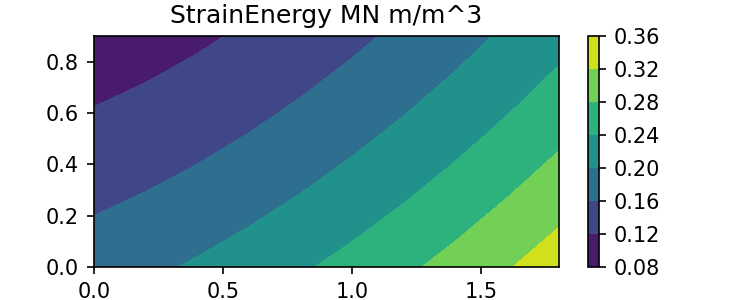

<IPython.core.display.Javascript object>


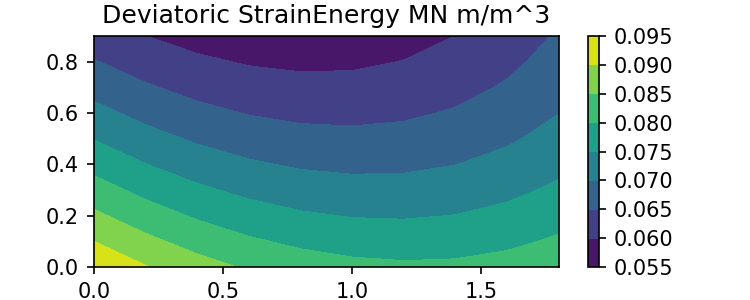

<IPython.core.display.Javascript object>


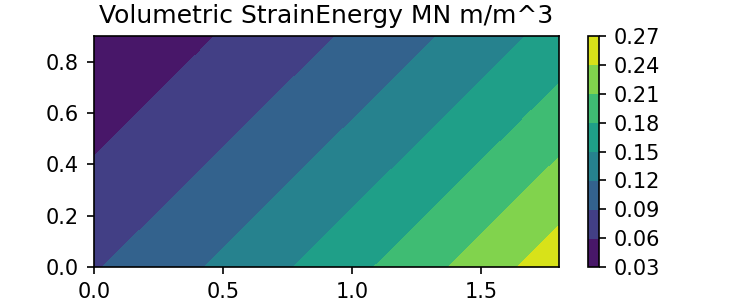

In [10]:
import sympy as sp
from sympy import Matrix, diff, simplify, integrate, lambdify
import numpy as np
X1,X2,X3 = sp.symbols("X_1 X_2 X_3")
import matplotlib.pyplot as plt
X = Matrix([X1,X2,X3])
x1 = X1+0.001*X2+0.0002*X1**2
x2 = 1.001*X2-0.0002*X2**2
x3 = X3
x = Matrix([x1,x2,x3])
u = x-X
display("u =",u)
gradu = Matrix([[diff(i,j) for j in X] for i in u])
display("\u2207u =",gradu)
esmall = 1/2*(gradu+gradu.T)
display("\u03B5 =",esmall)
strainvector = Matrix([esmall[0,0], esmall[1,1], esmall[2,2], 
               2*esmall[0,1], 2*esmall[0,2], 2*esmall[1,2]])
display("Strain vector =",strainvector)
Ee = 210000
Nu = 0.3
G = Ee/2/(1+Nu)
Cc = Matrix([[1/Ee,-Nu/Ee,-Nu/Ee,0,0,0], 
      [-Nu/Ee,1/Ee,-Nu/Ee,0,0,0],
      [-Nu/Ee,-Nu/Ee,1/Ee,0,0,0],
      [0,0,0,1/G,0,0],
      [0,0,0,0,1/G,0],
      [0,0,0,0,0,1/G]])
Dd = Cc.inv()
stressvector = Dd*strainvector
display("Stress vector =",stressvector)
S = Matrix([[stressvector[0], stressvector[3], stressvector[4]],
            [stressvector[3], stressvector[1], stressvector[5]],
            [stressvector[4], stressvector[5], stressvector[2]]])
display("Stress Matrix =",S)
StrainEnergy = simplify(sum([S[i]*esmall[i]/2 for i in range(9)]))
display("Strain energy (U) =",StrainEnergy)
TotalEnergy = integrate(StrainEnergy,(X1,0,2),(X2,0,1),(X3,0,0.01))
display("Total Energy =",TotalEnergy)
Udeviatoric = simplify(1/12/G*((S[0,0]-S[1,1])**2 + (S[2,2]- 
                  S[1,1])**2 + (S[0,0] - S[2,2])**2 + 
                  6*(S[0,1]**2 + S[0,2]**2 + S[1,2]**2)))
display("U_deviatoric =",Udeviatoric)
Uvolumetric = simplify((1-2*Nu)/6/Ee*(S[0,0]+S[1,1]+S[2,2])**2)
display("U_volumetric =",Uvolumetric)
display("Check for energy total:",simplify(StrainEnergy-Udeviatoric-Uvolumetric))
display("Contour plots:")
def plot(f, limits, title):
    x1, xn, y1, yn = limits
    dx, dy = 10/100*(xn-x1),10/100*(yn-y1)
    xrange = np.arange(x1,xn,dx)
    yrange = np.arange(y1,yn,dy)
    X, Y = np.meshgrid(xrange, yrange)
    lx, ly = len(xrange), len(yrange)
    F = lambdify((X1,X2),f)
    Z = F(X,Y)*np.ones(lx*ly).reshape(lx, ly)
    fig = plt.figure(figsize = (5,2))
    ax = fig.add_subplot(111)
    cp = ax.contourf(X,Y,Z)
    fig.colorbar(cp)
    plt.title(title)
plot(StrainEnergy, [0,2,0,1],"StrainEnergy MN m/m^3")
plot(Udeviatoric, [0,2,0,1],"Deviatoric StrainEnergy MN m/m^3")
plot(Uvolumetric, [0,2,0,1],"Volumetric StrainEnergy MN m/m^3")